# XGBoost Classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Load the dataset
iris=load_iris()
X=iris.data[:,:2] # first 2 input features
y=iris.target # target

# Splitting into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# XGBoost Classifier
xgb_clf=xgb.XGBClassifier(n_estimators=100,random_state=42)
# Training the model
xgb_clf.fit(X_train,y_train)

# Predict on test data
y_pred=xgb_clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      0.56      0.53         9
           2       0.60      0.55      0.57        11

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30


Confusion Matrix: 
 [[10  0  0]
 [ 0  5  4]
 [ 0  5  6]]


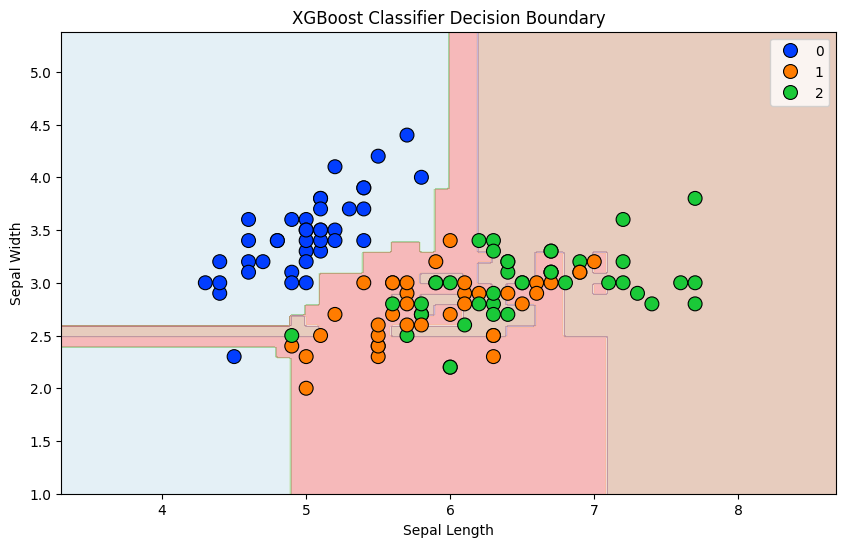

In [6]:

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = xgb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Scatter plot for training data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="bright", edgecolor="black", s=100)

# Labels and title
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("XGBoost Classifier Decision Boundary")
plt.show()
